In [1]:
import osmnx as ox
import networkx as nx
from networkx.algorithms.approximation import traveling_salesman_problem

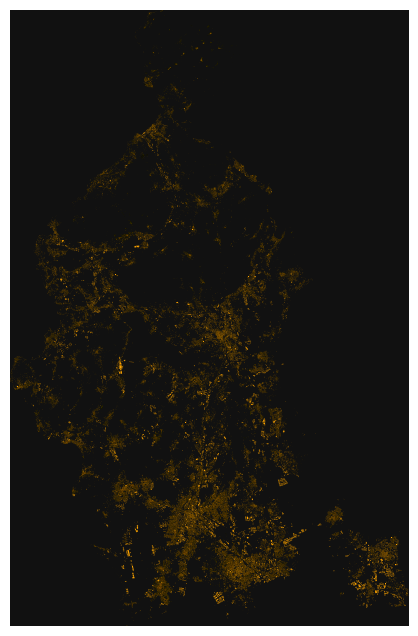

In [2]:
gdf = ox.features_from_place("Varese, Lombardia, Italy", {"building": True})
gdf.shape
fig, ax = ox.plot_footprints(gdf)

Consideriamo una regione quadrata di lato 2000m intorno a un punto, in questo caso la stazione dei treni di Varese: questa sarà l'area di consegna del nostro postino.

/Users/gabrieleorlandi/Git/city-mail-optimizer/.venv/lib/python3.11/site-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


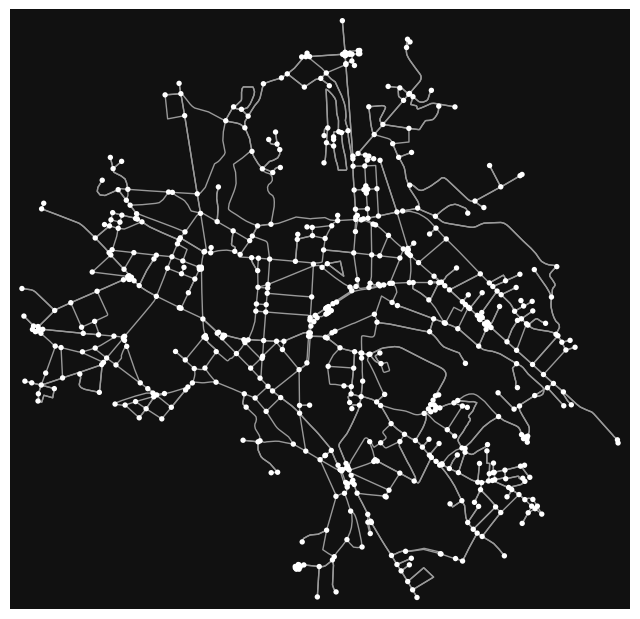

In [3]:
G = ox.graph_from_address(
    address="Piazzale Trento, Varese, Italy",
    dist=2000,
    dist_type="network",
    network_type="drive",
)
fig, ax = ox.plot_graph(G)

In [4]:
node_list = list(G.nodes())

In [5]:
starting_node = node_list[0]

In [6]:
from random import sample

delivery_nodes = sample(node_list, 8)

In [7]:
best_route = traveling_salesman_problem(
    G,
    nodes=delivery_nodes,
    cycle=True,
    method=None,
  )

NetworkXError: G is not strongly connected

In [8]:
nx.is_strongly_connected(G)

False

In [9]:
largest = max(nx.strongly_connected_components(G), key=len)

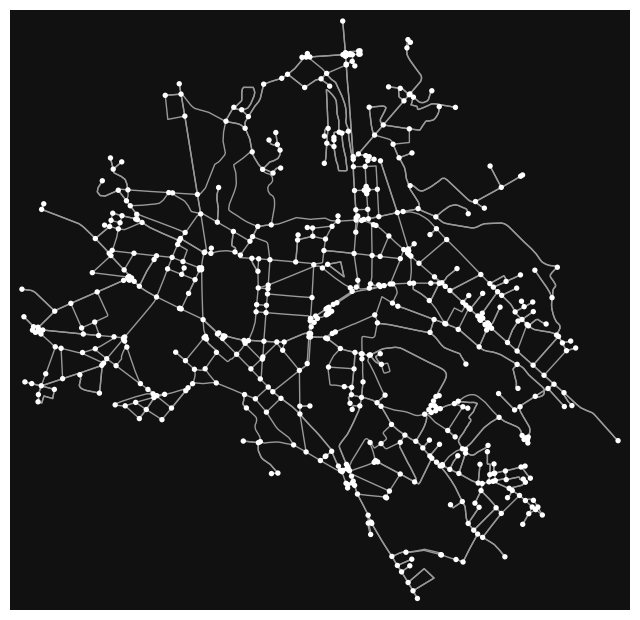

In [10]:
G_conn = G.subgraph(largest)
fig, ax = ox.plot_graph(G_conn)

In [11]:
delivery_nodes = [starting_node] + sample(node_list, 8)

In [12]:
starting_node

119665893

In [13]:
delivery_nodes

[119665893,
 11627047306,
 192374563,
 243320217,
 221226611,
 553184581,
 415793193,
 243319848,
 2866781923]

In [14]:
best_route = traveling_salesman_problem(
    G_conn,
    nodes=delivery_nodes,
    cycle=True,
    method=None,
  )

In [15]:
best_route_reordered = best_route[best_route.index(starting_node):-1] + best_route[:best_route.index(starting_node)] + [starting_node]

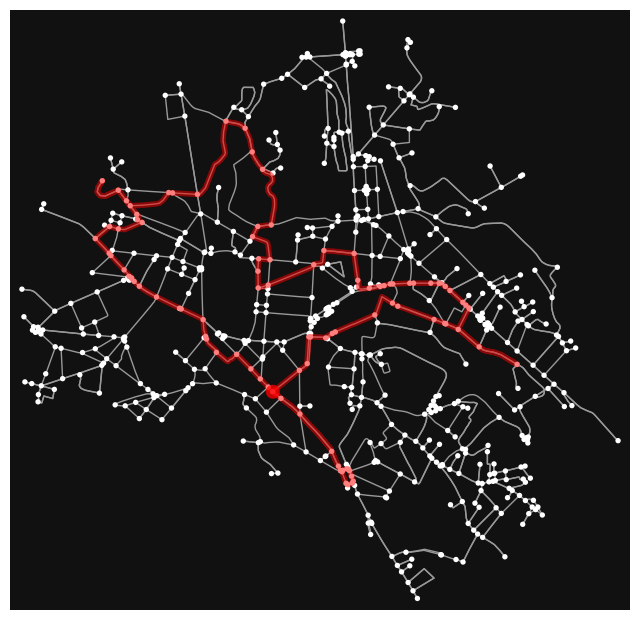

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [16]:
ox.plot.plot_graph_route(G_conn, best_route_reordered, route_color='r', route_linewidth=4, route_alpha=0.5, orig_dest_size=100)